# Temporal and Spatial DataMining


## Exercise_07_Segmentation

**Task 1**

**a)**  Why is a segmentation procedure useful in procesin time series data, and what is the difference between **online** and **offline** segementation? 


 **---  Your Text Here ----** 


**b)** What are the differences between top-down segmentation, bottom-up segmentation and sliding-window segmentation? When does it make sense to use a particular process?


 **---  Your Text Here ----** 


**Task 2**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('ggplot')

from ipywidgets import interact
import ipywidgets as widgets

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
with open("data/ecg.txt") as f:
    file_lines = f.readlines()

y = np.array([float(x.split("\t")[2].strip()) for x in file_lines[100:320]])
x = np.arange(1, len(y) + 1)

In [3]:
def draw_plot(x, y, plot_title):
    plt.figure(figsize=(12,5))
    plt.plot(x, y, alpha=0.8, color='blue')
    plt.title(plot_title)
    plt.xlabel("Samples")
    plt.ylabel("Signal")

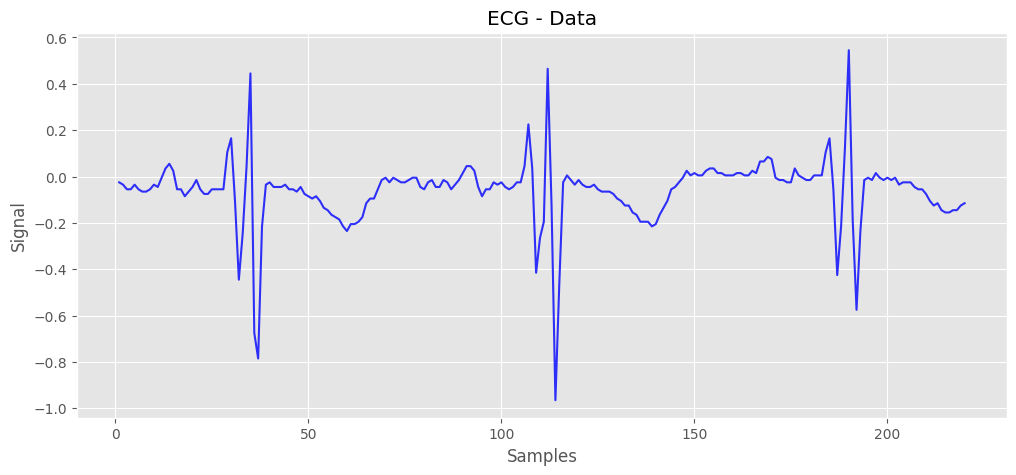

In [4]:
draw_plot(x, y,"ECG - Data")

**a)** Bottom-up, top-down and sliding-window segmentation

- Implement a function with the name `regression` to fit a line into a given segment of a sequence using linear regression

- Implement a cost function with the name `sumsquared_error` to calculate the squared sum of errors for a fitted line into a segment of a sequence

> **Hint:** [`numpy.linalg.lstsq`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)

In [5]:
from numpy.linalg import lstsq

In [144]:
def regression(data):
    ''' Fits linear regression with degree=1 on timeseries
    Args:
        x: index of timeseries
        y: targets of timeseries

    Returns:
        coeff: (m, b) of linear model mx + b
        err: sum of squared error of fitted model
    '''
    x, y = data
    A = np.vstack([x, np.ones(len(x))]).T
    coeff, err = np.linalg.lstsq(A, y, rcond=None)[:2]
    return coeff, err.item()

4.7114802025774365


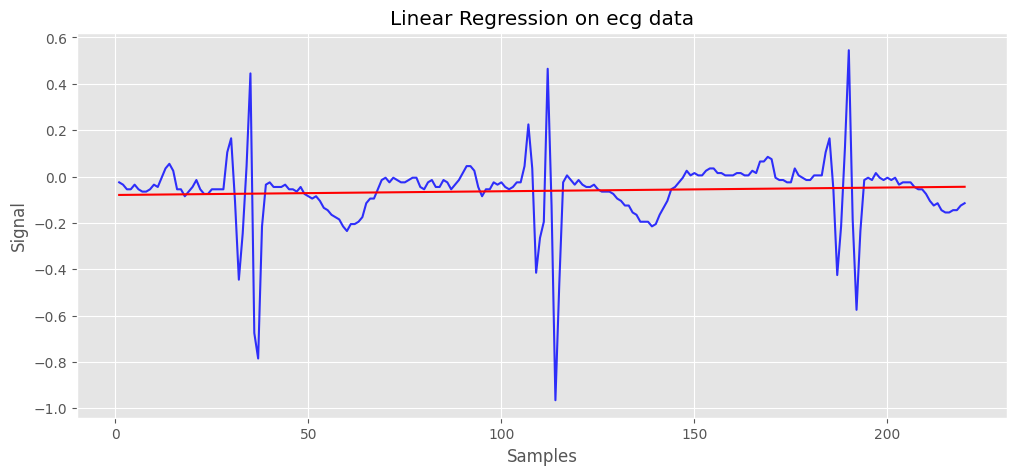

In [132]:
# test linear regression on whole timeseries
coeff, err = regression((x, y))
m, b = coeff

print(err)

draw_plot(x, y, 'Linear Regression on ecg data')
plt.plot(x, m*x + b, 'r', label='Fitted line')
plt.show()

**b)** Create a function, which return a list of segments using the bottom-up technique

>**Hint:** The following functions should return a list of segments. Each Segment contains four values of the fitted line:

    [(x0, y0, x1, y1), ... , (x0, y0, x1, y1)]

In [133]:
# define helper function to merge two segments
def merge(seg1, seg2):
    x0, y0 = seg1
    x1, y1 = seg2 
    return (x0+x1, y0+y1)

In [148]:
def bottom_up(x, y, max_error):
    # create segments of size K=2 (non-overlapping)
    Seg_TS = [([x[i], x[i+1]], [y[i], y[i+1]]) for i in range(0, len(x)-1, 2)]
    merge_costs = [regression(merge(Seg_TS[i], Seg_TS[i+1]))[1] for i in range(len(Seg_TS)-1)]
    
    # merge cheapest pairs
    while min(merge_costs) < max_error:
        idx = np.argmin(merge_costs)
        Seg_TS[idx] = merge(Seg_TS[idx], Seg_TS[idx+1])
        del Seg_TS[idx+1]
        merge_costs[idx] = regression(Seg_TS[idx])[1]
        del merge_costs[idx-1]

    # fit regression on each segment (only for plotting later)
    segments = []
    for seg in Seg_TS:
        x0, x1 = seg[0][0], seg[0][-1]
        if len(seg[0]) == 2: # segment has only two points (line)
            segments.append((x0, seg[1][0], x1, seg[1][-1]))
        else:
            m, b = regression(seg)[0]
            y0 = m*x0 + b
            y1 = m*x1 + b
            segments.append((x0,y0,x1,y1))

    return segments

**c)** Create a function, which return a list of segments using the top-down technique

In [ ]:
####################
# Your Code Here   #
####################

**d)** Create a function, which return a list of segments using the sliding-window technique

In [ ]:
####################
# Your Code Here   #
####################

**e)** Use the following functions to plot the resulting segmentation procedure considering different error thresholds.

- Explain the results

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

In [153]:
def draw_segments(segments):
    ax = plt.gca()
    for segment in segments:
        line = Line2D((segment[0],segment[2]),(segment[1],segment[3]))
        ax.add_line(line)

In [156]:
data = y

def bottom_up_with_reg(max_error):
    #bottom-up with regression
    plt.figure(figsize=(20,8))
    max_error = max_error/100
    print('maximal error: ', max_error)
    
    segments = bottom_up(x,y, max_error)
    draw_plot(x, y,"Bottom-up with regression")
    draw_segments(segments)
    plt.show()
    
# def top_down_with_reg(max_error):

#     #top-down with regression
#     plt.figure(figsize=(20,8))
#     max_error = max_error/100
    
#     print('maximal error: ', max_error)
#     segments = topdownsegment(data, regression, sumsquared_error, max_error)
#     draw_plot(x, y,"Top-down with regression")
#     draw_segments(segments)
    
# def sliding_window_with_reg(max_error):
#     #sliding window with regression
#     plt.figure(figsize=(20,8))
#     max_error = max_error/100
#     print('maximal error: ', max_error)
    
#     segments = slidingwindowsegment(data, regression, sumsquared_error, max_error)
#     draw_plot(x, y,"Sliding window with regression")
#     draw_segments(segments)
#     plt.show()

In [157]:
interact(bottom_up_with_reg, max_error=widgets.IntSlider(min=1, max=100, size=101, step=1, value=0.001))

interactive(children=(IntSlider(value=1, description='max_error', min=1), Output()), _dom_classes=('widget-int…

<function __main__.bottom_up_with_reg(max_error)>

In [ ]:
interact(top_down_with_reg, max_error=widgets.IntSlider(min=1, max=100, size=101, step=1, value=0.001))

In [ ]:
interact(sliding_window_with_reg, max_error=widgets.IntSlider(min=1, max=100, size=101, step=1, value=0.001))

**f)** Further Segmentation techniques

Consider the shape of the following signal. Which segmentation procedure is suitable in this case?

In [ ]:
Fs = 10000
fc = 100 
fm = 20
b = 10

t = np.arange(0, 0.1, 1/Fs)
fm = np.cos(2*np.pi*fc*t + b*np.sin(2*np.pi*fm*t))

plt.figure(figsize=(15,5))
plt.plot(t, fm)
plt.show()

**Task 3: Optimal Segmentation and SWAB** (Bonus)

**a)** Practice the example for the optimal segmentation from the lecture again on a paper, preferably at home.

**b)** Implement the optimal segmentation in Python.

In [ ]:
x = np.array([1., 2., 3., 4., 5., 6., 7.])
y = np.array([2., 5., 4., 6., 3., 1., 4.])

In [ ]:
plt.figure()
plt.plot(x,y, '-o')
plt.show()

In [ ]:
####################
# Your Code Here   #
####################

**c)** Describe the SWAB algorithm.